## A/B Testing Marketing Promotions

#### Which promotion was the most effective?

Scenario:

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

The description of the data set: Our data set consists of 548 entries including:

- MarketId: an inhouse tag used to describe market types, we won't be using it

- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.

- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.

- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.

- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.

- Market size: there are three types of market size: small, medium and large.

- Week: One of four weeks when the promotions were run (1–4).

## Examine The Dataset :
We can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In [1]:
#IMPORT THE LIBRARIES....
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
import matplotlib.pyplot as plt # Visualization of the data....
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r"WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

In [3]:
df.sort_values(by='LocationID').head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
11,1,Medium,3,12,1,4,34.75
10,1,Medium,3,12,1,3,45.49


In [4]:
#SHAPE OF THE DATASET.....
print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (548, 7)


In [5]:
#CHECK THE COLUMNS NAME....
print("Columns in DataFrame is :\n",df.columns)

Columns in DataFrame is :
 Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')


In [6]:
#PRINT THE COMPLETE INFORMATION OF THE DATASET.....
# Print a Summary of a Dataframe is :"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


## Basic statistics:

In [7]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [8]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [9]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['MarketSize']


In [10]:
Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

 Integers are: ['MarketID', 'LocationID', 'AgeOfStore', 'Promotion', 'week']


In [11]:
Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

Float are: ['SalesInThousands']


In [12]:
# Find the unique columns
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [13]:
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
df.isna().any()

MarketID            False
MarketSize          False
LocationID          False
AgeOfStore          False
Promotion           False
week                False
SalesInThousands    False
dtype: bool

In [14]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

## Detecting the duplicates

In [15]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

## Finding the correlation:

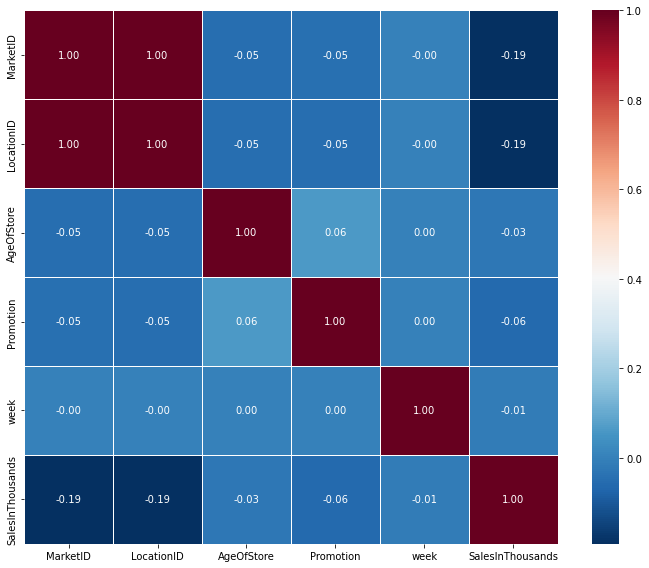

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

## Analysis On MarketSize Variable

In [17]:
df['MarketSize'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [18]:
df['MarketSize'] = df['MarketSize'].replace(['Small'],1)
df['MarketSize'] = df['MarketSize'].replace(['Medium'],2)
df['MarketSize'] = df['MarketSize'].replace(['Large'],3)

Unique categories present in the MarketSize: 2    320
3    168
1     60
Name: MarketSize, dtype: int64




<Figure size 576x576 with 0 Axes>

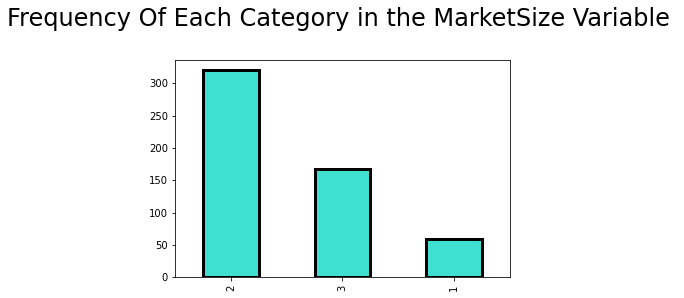

<Figure size 576x576 with 0 Axes>

In [19]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the MarketSize:",df["MarketSize"].value_counts())
print('\n')

#VISUALIZING THE "Education"
df['MarketSize'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the MarketSize Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [20]:
df['sales_age_store']=df['SalesInThousands']/df['AgeOfStore']
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,sales_age_store
0,1,2,1,4,3,1,33.73,8.4325
1,1,2,1,4,3,2,35.67,8.9175
2,1,2,1,4,3,3,29.03,7.2575
3,1,2,1,4,3,4,39.25,9.8125
4,1,2,2,5,2,1,27.81,5.5620


In [21]:
# Using unstack
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,1,2,3
Promotion,,,
1,20,96,56
2,16,108,64
3,24,116,48


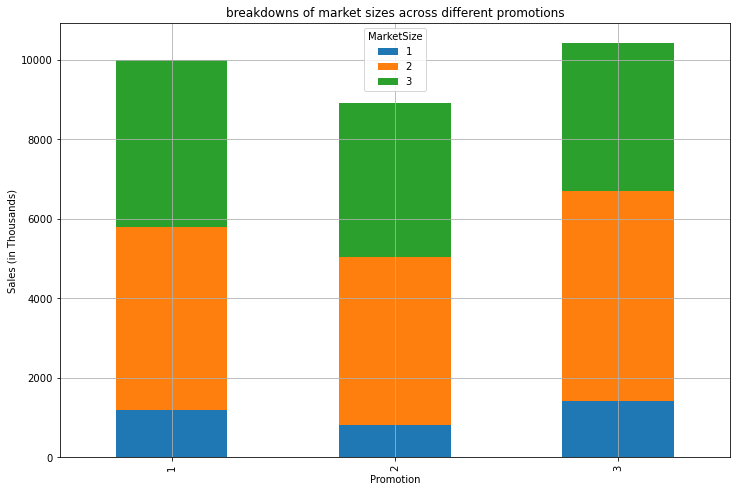

In [22]:
ax = df.groupby(['Promotion', 'MarketSize']).sum()['SalesInThousands'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,8),
    grid=True,
    stacked=True
)
ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

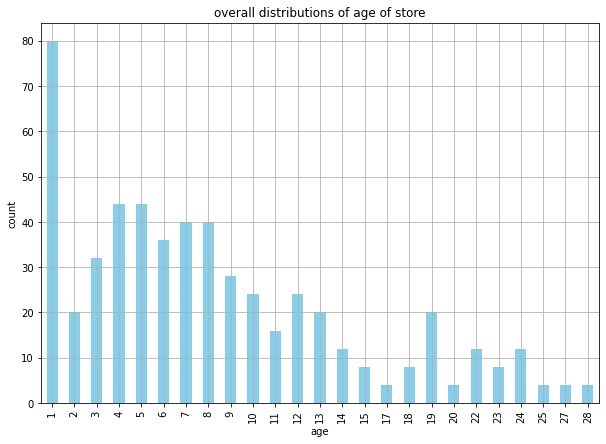

In [23]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

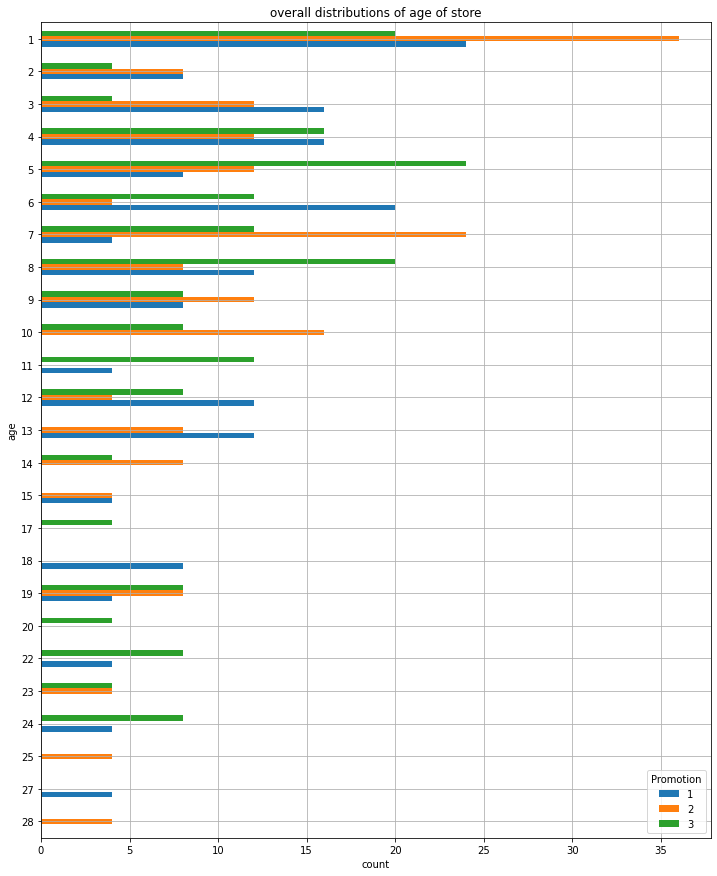

In [24]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

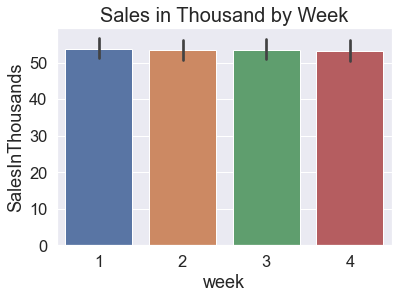

In [25]:
#Sales by Week - overall
sns.set(font_scale=1.5) 
sns.barplot(x='week', y='SalesInThousands', data=df)
plt.title("Sales in Thousand by Week", fontdict={'fontsize': 20})
plt.show()

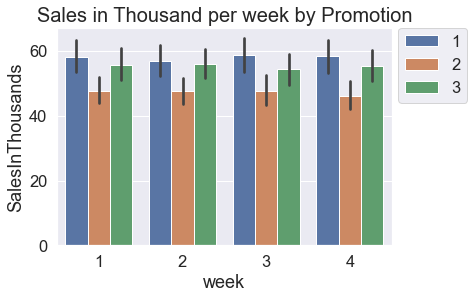

In [26]:
sns.set(font_scale=1.5)
sns.barplot(x='week', y='SalesInThousands', data=df, hue='Promotion')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand per week by Promotion", fontdict={'fontsize': 20})
plt.show()

### Analysis On SalesInThousands Variable.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


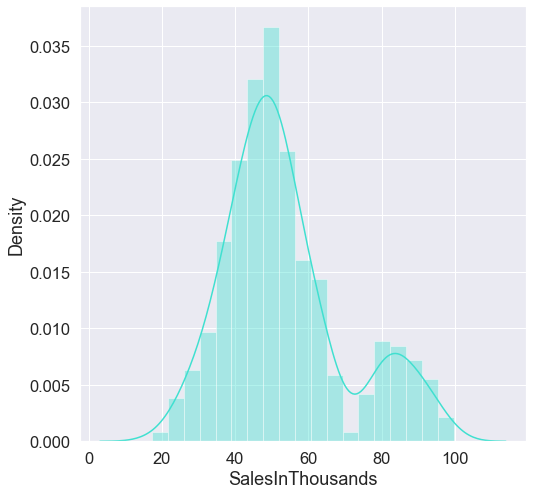

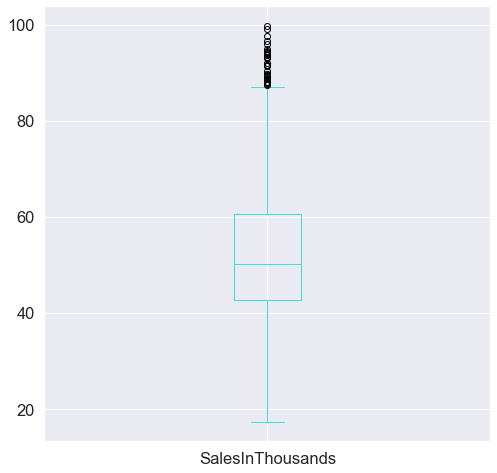

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(df["SalesInThousands"],color = 'turquoise')
plt.show()
df["SalesInThousands"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

In [28]:
#Distribution of Sales by Promotion Size
data=[np.array(df[df['Promotion'] ==1]['SalesInThousands']),
      np.array(df[df['Promotion'] ==2]['SalesInThousands'])
      ,np.array(df[df['Promotion'] ==3]['SalesInThousands'])]

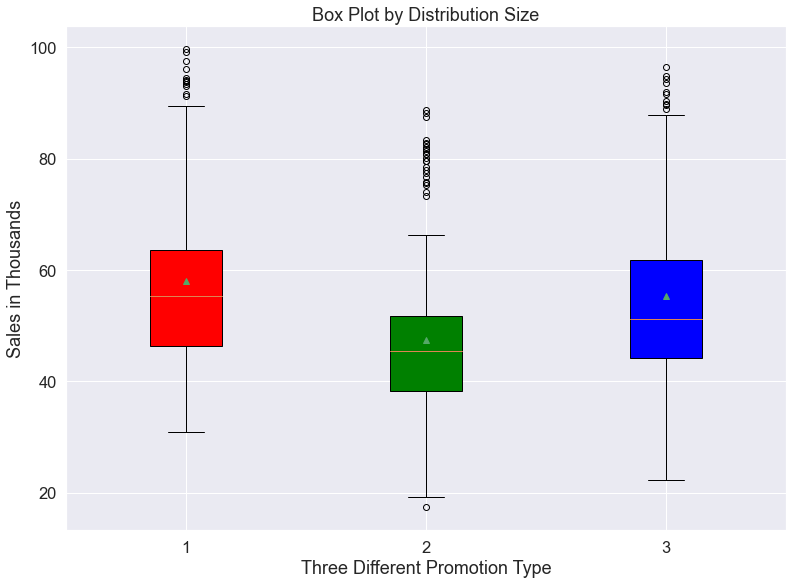

In [29]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1,1])
bp=ax.boxplot(data, vert=True, patch_artist=True, showmeans=True)
ax.set_title("Box Plot by Distribution Size")

#Fill with colors
colors=['red', 'green', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


#Adding Horizontal Grid Lines
ax.yaxis.grid(True)
ax.set_xlabel('Three Different Promotion Type')
ax.set_ylabel('Sales in Thousands')
plt.show()

# EDA and Visualizations

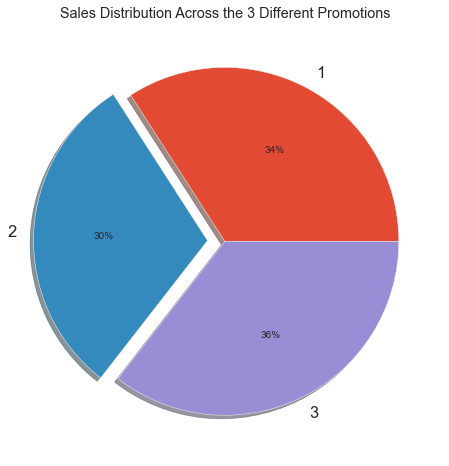

In [30]:
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


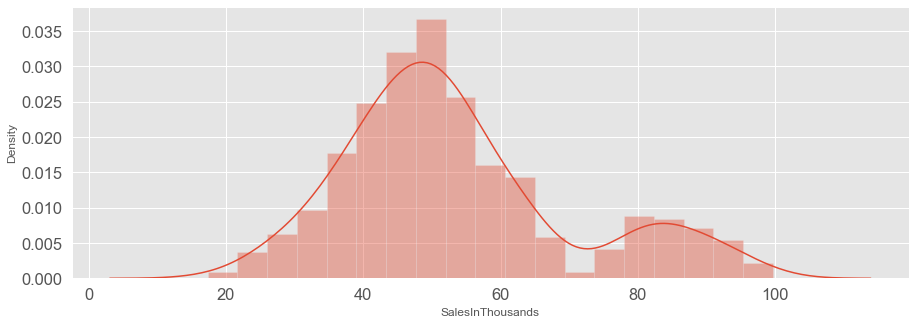

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(df['SalesInThousands']);

**We have a bimodal distribution**

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

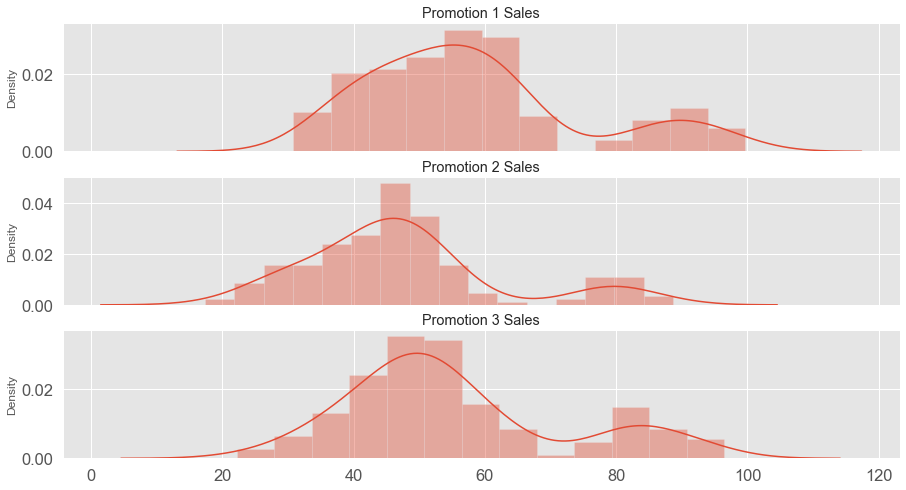

In [32]:
fig,ax=plt.subplots(3,1,figsize=(15,8),sharex=True)

for i in [1,2,3]:
    sns.distplot(df.loc[df['Promotion']==i,'SalesInThousands'],ax=ax[i-1])
    ax[i-1].set_title('Promotion {} Sales'.format(i))
    ax[i-1].set_xlabel ("")

**T-test requires normality but here we have a bimodal distribution, so will split into <=65 & >65 groups**

In [33]:
for i in [1,2,3]:
    print("Count of obs with >65 SALES promo_{}: {}".format(i,len(df[(df['SalesInThousands']>65) & (df['Promotion']==i)]))) 
    ###check how many obs in upper distribution

Count of obs with >65 SALES promo_1: 39
Count of obs with >65 SALES promo_2: 24
Count of obs with >65 SALES promo_3: 39


We have sufficient obs in all 3 promos fot >65 sales, thus we can conduct a seperate t-test for >65 group

**Means of Sales <65 group**

In [34]:
df[df["SalesInThousands"]<=65].groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    50.744361
2    42.608049
3    47.983691
Name: SalesInThousands, dtype: float64

**Means of Sales >65 group**

In [35]:
df[df["SalesInThousands"]>65].groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    83.180256
2    79.592083
3    83.562821
Name: SalesInThousands, dtype: float64

**Distribution of <=65 sales group**

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

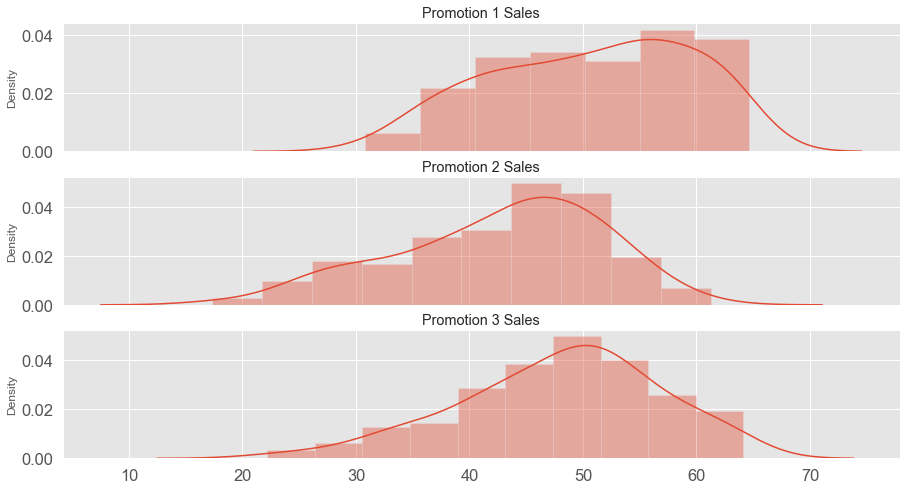

In [36]:
fig,ax=plt.subplots(3,1,figsize=(15,8),sharex=True)

for i in [1,2,3]:
    sns.distplot(df.loc[(df['Promotion']==i) & (df['SalesInThousands']<=65),'SalesInThousands'],ax=ax[i-1])
    ax[i-1].set_title('Promotion {} Sales'.format(i))
    ax[i-1].set_xlabel ("")

**Checking distribution of >65 group**

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

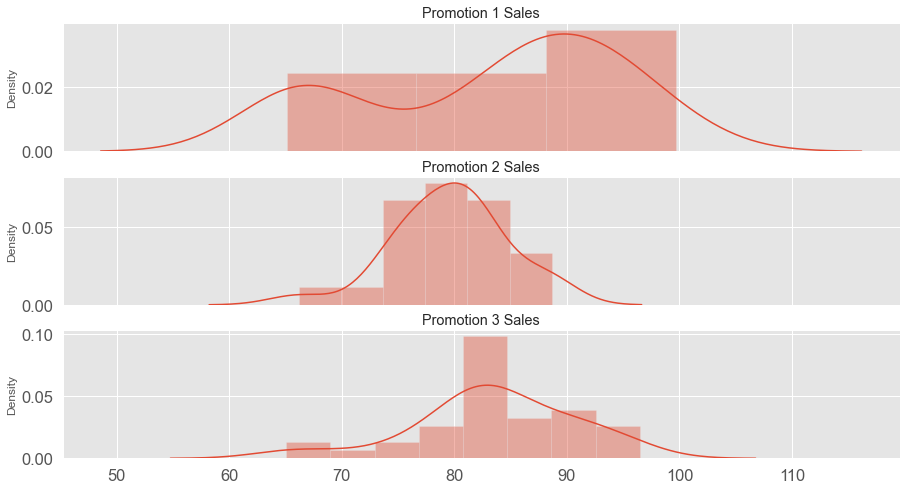

In [37]:
fig,ax=plt.subplots(3,1,figsize=(15,8),sharex=True)

for i in [1,2,3]:
    sns.distplot(df.loc[(df['Promotion']==i) & (df['SalesInThousands']>65),'SalesInThousands'],ax=ax[i-1])
    ax[i-1].set_title('Promotion {} Sales'.format(i))
    ax[i-1].set_xlabel ("")

#### Assumption Control

The common assumptions made when doing a t-test include normality of data distribution and equality of variance in standard deviation.

1. Normality of data distribution
2. Equality of variances

#### Normality Test for <=65 group

H0: The data is normally distributed

H1: The data is not normally distributed


In [38]:
from scipy.stats import shapiro
print ("Promotion 1 & <= 65: {}".format(shapiro(df.loc[(df['Promotion'] == 1) 
                                                       & (df['SalesInThousands']<=65), 'SalesInThousands'])))
print ("Promotion 2 & <= 65: {}".format(shapiro(df.loc[(df['Promotion'] == 2) 
                                                       & (df['SalesInThousands']<=65), 'SalesInThousands'])))
print ("Promotion 3 & <= 65: {}".format(shapiro(df.loc[(df['Promotion'] == 3) 
                                                       & (df['SalesInThousands']<=65), 'SalesInThousands'])))

Promotion 1 & <= 65: ShapiroResult(statistic=0.958892285823822, pvalue=0.0004932560259476304)
Promotion 2 & <= 65: ShapiroResult(statistic=0.9712842702865601, pvalue=0.0017379027558490634)
Promotion 3 & <= 65: ShapiroResult(statistic=0.9813416600227356, pvalue=0.04059775173664093)


###### All 3 groups pass normality test

#### Normality Test for >65 group

H0: The data is normally distributed

H1: The data is not normally distributed


In [39]:
from scipy.stats import shapiro
print ("Promotion 1 & > 65: {}".format(shapiro(df.loc[(df['Promotion'] == 1) 
                                                      & (df['SalesInThousands']>65), 'SalesInThousands'])))
print ("Promotion 2 & > 65: {}".format(shapiro(df.loc[(df['Promotion'] == 2) 
                                                      & (df['SalesInThousands']>65), 'SalesInThousands'])))
print ("Promotion 3 & > 65: {}".format(shapiro(df.loc[(df['Promotion'] == 3) 
                                                      & (df['SalesInThousands']>65), 'SalesInThousands'])))

Promotion 1 & > 65: ShapiroResult(statistic=0.8731706738471985, pvalue=0.0004092589661013335)
Promotion 2 & > 65: ShapiroResult(statistic=0.9646238088607788, pvalue=0.5380414724349976)
Promotion 3 & > 65: ShapiroResult(statistic=0.9593083262443542, pvalue=0.16909459233283997)


###### 2 groups fail normality test, so testing can't be done for these 3 groups

### Checking Same Variance Assumption

H0: The variances are equal(homogenous)

H1: The variances are unequal(non-homogenous)

In [40]:
#promo 1 & promo 2 
stats.levene(df.loc[(df['Promotion'] == 1) & (df['SalesInThousands']<=65),'SalesInThousands']
             , df.loc[(df['Promotion'] == 2) & (df['SalesInThousands']<=65), 'SalesInThousands'])

LeveneResult(statistic=0.08101138968625114, pvalue=0.776131155039429)

**Promo 1 & 2 have diff variances, so will do unequal variances t-test for them**

In [41]:
#promo 1 & promo 3 
stats.levene(df.loc[(df['Promotion'] == 1) & (df['SalesInThousands']<=65),'SalesInThousands']
             , df.loc[(df['Promotion'] == 3) & (df['SalesInThousands']<=65), 'SalesInThousands'])

LeveneResult(statistic=0.6698505571326162, pvalue=0.41379969879676226)

**Promo 1 & 3 have diff variances, so will do unequal variances t-test for them**

## A/B Testing for <=65 group

#### Comparing Promotion 1 vs Promotion 2

In [42]:
t, p= stats.ttest_ind(df.loc[(df['Promotion'] == 1) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    df.loc[(df['Promotion'] == 2) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 7.824776742399254
p-value = 9.879819174248633e-14


In [43]:
df[df["SalesInThousands"]<=65].groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    50.744361
2    42.608049
3    47.983691
Name: SalesInThousands, dtype: float64

**P<0.05 thus statistically significant difference in sales of Promo 1 & 2, promo 1 should be preferred**

#### Comparing Promotion 1 vs Promotion 3

In [44]:
t, p= stats.ttest_ind(df.loc[(df['Promotion'] == 1) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    df.loc[(df['Promotion'] == 3) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 2.6332470611279164
p-value = 0.008932765144586902


**P<0.05 thus statistically significant difference in sales of Promo 1 & 3, promo 1 should be preferred**

#### Comparing Promotion 2 vs Promotion 3

In [45]:
t, p= stats.ttest_ind(df.loc[(df['Promotion'] == 2) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    df.loc[(df['Promotion'] == 3) & (df['SalesInThousands']<=65), 'SalesInThousands'], 
    equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = -5.308277452910551
p-value = 2.114606026499446e-07


In [46]:
df[df["SalesInThousands"]<=65].groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    50.744361
2    42.608049
3    47.983691
Name: SalesInThousands, dtype: float64

**P<0.05 thus statistically significant difference in sales of Promo 2 & 3, promo 3 should be preferred**